In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Customers_info.csv')

# Check the shape of the dataset
print('Shape of the dataset:', df.shape)

# Check the data types of the columns
print('\nData types of the columns:')
print(df.dtypes)

# Check for missing values
print('\nMissing values in each column:')
print(df.isnull().sum())

# Get a summary of the numerical columns
df.describe().astype(int)

Shape of the dataset: (200, 5)

Data types of the columns:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200,200,200,200
mean,100,38,60,50
std,57,13,26,25
min,1,18,15,1
25%,50,28,41,34
50%,100,36,61,50
75%,150,49,78,73
max,200,70,137,99


**Age** : The average age of customer's is 39, with a range from 18 to 70. Around 25% are younger than 29 (25th percentile), while the median age is 36. Additionally, 75% are younger than 49 (75th percentile), indicating a predominantly younger customer base. The standard deviation of approximately 14 suggests a fair spread of ages.<br>
**Annual Income** : The average annual income is approximately $60.5k, with a standard deviation of around 26.3k, suggesting a significant range in incomes.
The lowest recorded income is 15k, while the highest is 137k. The 25th percentile represents an income of 41.5k, the median is 61.5k, and the 75th percentile corresponds to an income of 78k. <br>
**Spending Score** :The average spending score is 50.2, with a standard deviation of about 25.8, indicating a broad range of spending behaviors. The lowest score recorded is 1, while the highest is 99. The 25th percentile corresponds to a score of 34.75, the median is 50, and the 75th percentile represents a score of 73.

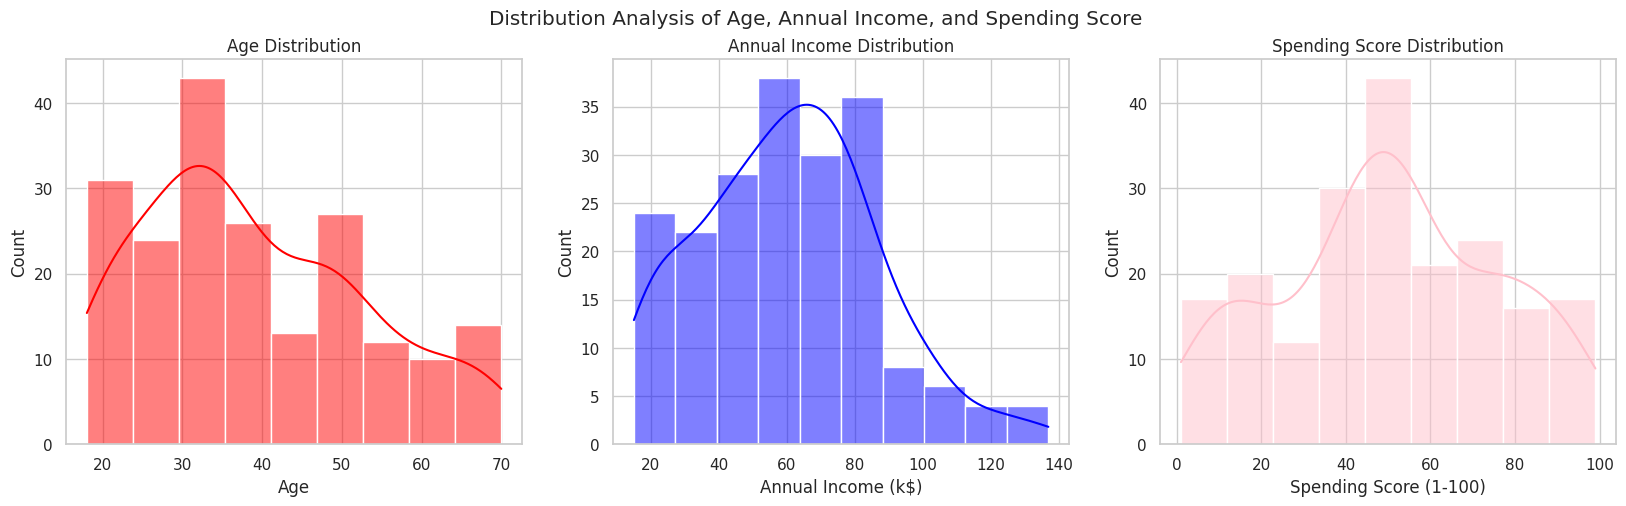

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the seaborn plot
sns.set(style='whitegrid')

# Create a figure and axis objects
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot the distribution of age, annual income, and spending score
sns.histplot(data=df, x='Age', kde=True, color='red', ax=axs[0])
sns.histplot(data=df, x='Annual Income (k$)', kde=True, color='blue', ax=axs[1])
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, color='pink', ax=axs[2])

# Set the titles of the plots
axs[0].set_title('Age Distribution')
axs[1].set_title('Annual Income Distribution')
axs[2].set_title('Spending Score Distribution')

# Set the title for the entire plot
fig.suptitle('Distribution Analysis of Age, Annual Income, and Spending Score')

# Display the plots
plt.show()

**Age** : The mall’s customer base is predominantly younger, as indicated by the left-skewed age distribution.<br>
**Annual Income** : The left-skewed annual income distribution suggests that the mall attracts a wealthier clientele.<br>
**Spending Score** : The spending score distribution is centered, indicating a balanced mix of low-spending and high-spending customers.


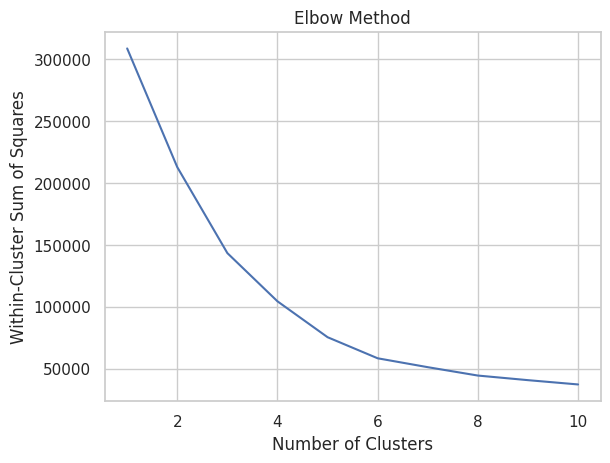

In [4]:
#Clustering using Elbow Method
from sklearn.cluster import KMeans

# Select the features to use for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

# The point where the score begins to decrease more slowly (the “elbow”) is considered the optimal number of clusters.
# Here we take 5 from the graph

In [5]:
# Create the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model to the data and predict the cluster labels
labels = kmeans.fit_predict(features)

# Add the cluster labels to the dataframe
df['Cluster'] = labels

# Display the first few rows of the dataframe with the cluster labels
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
5,6,Female,22,17,76,3
6,7,Female,35,18,6,0
7,8,Female,23,18,94,3
8,9,Male,64,19,3,0
9,10,Female,30,19,72,3


In [6]:
# Calculate the mean values of Age, Annual Income, and Score for each cluster
cluster_means = df.groupby('Cluster')[
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().astype(int)

# Display the cluster means
cluster_means

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,25,26,78
4,40,87,17


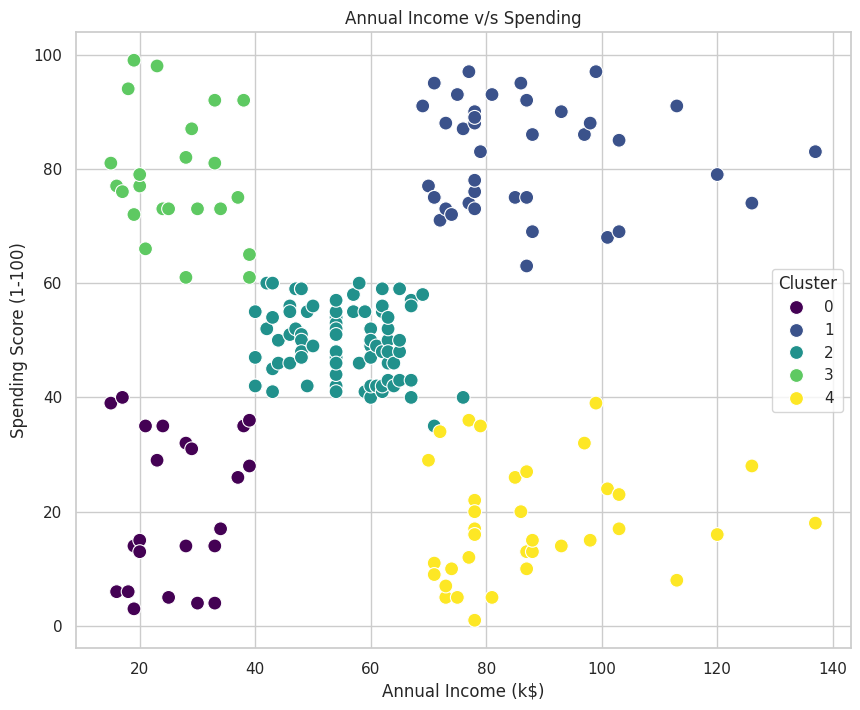

In [7]:
#Annual Income vs Spending Score
# Create a scatter plot of 'Annual Income (k$)' vs 'Spending Score (1-100)' colored by 'Cluster'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)

# Add a title to the plot
plt.title('Annual Income v/s Spending')

# Display the plot
plt.show()

Interpretation from the Clusters: <br>
The clusters identified provide a clear picture of different customer segments based on their income and spending habits. <br>
1. Low income, low spending: Customers with an annual income between 20 and 40k and a spending score between 0 and 40. They have lower incomes and tend to spend less.<br>
2. High income, low spending: Customers with an annual income between 55 and 140k and a spending score between 0 and 40. Despite their higher incomes, they tend to spend less.<br>
3. Medium income, medium spending: Customers with an annual income between 40 and 80k and a spending score between 40 and 60. These customers have moderate incomes and spending habits. This is the most concentrated cluster, indicating a large number of customers fall into this category.<br>
4. Low income, high spending: Customers with an annual income between 20 and 40k and a spending score between 60 and 100. Interestingly, these customers have lower incomes but tend to spend more.<br>
5. High income, high spending: Customers with an annual income between 70 and 140k and a spending score between 60 and 100. These customers have higher incomes and also tend to spend more.


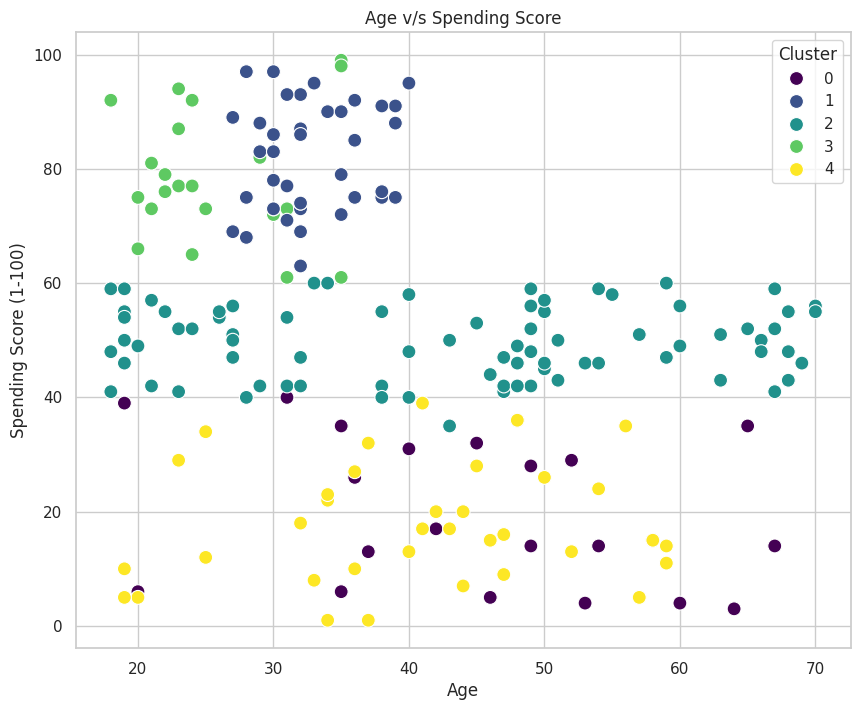

In [ ]:
# Age v/s Spending
# Create a scatter plot of Age vs Spending Score
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster',
palette='viridis', s=100)

# Add a title to the plot
plt.title('Age v/s Spending Score')

# Display the plot
plt.show()

Interpretation from Cluster: <br>
1. Young, high spenders: This cluster represents younger customers who have high spending scores. They might be attracted to trendy items and are willing to spend more. These two clusters include customers in their 20s and 30s with a spending score between 60 and 100. The fact that these clusters are almost overlapping could suggest that age is less of a distinguishing factor among these high-spending customers. These customers are likely to be the mall’s high-value customers due to their high spending scores.<br>
2. Middle-aged, moderate spenders: This cluster represents customers in their middle age with moderate spending scores. They might be more conservative in their spending habits. This cluster includes ages ranging from 20 to 70 and a spending score between 40 and 60. This is a broad age range, suggesting that the mall attracts customers of various ages who have a moderate spending score. This could be the mall’s primary customer base.<br>
3. Older, low spenders: This cluster represents older customers who have low spending scores. They might be more frugal or less attracted to the products offered.

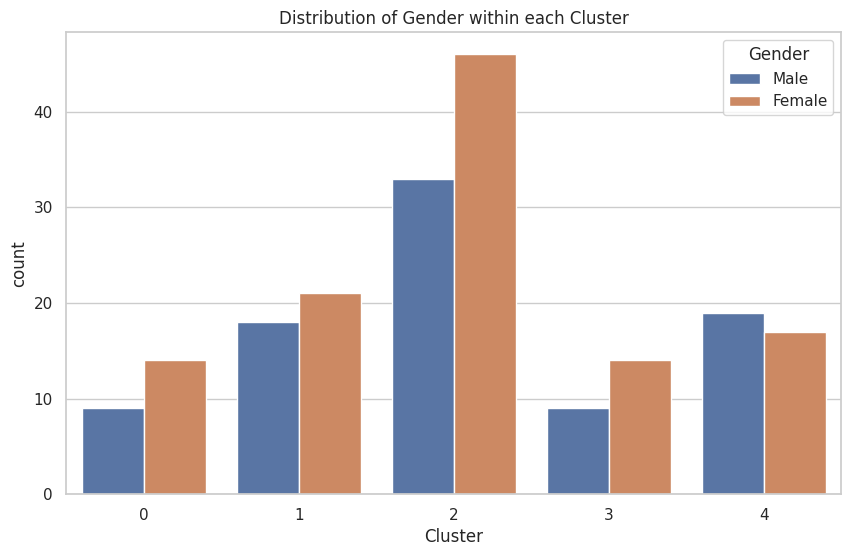

In [8]:
# Gender vs Cluster
# Create a count plot to show the distribution of 'Gender' within each cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Gender')

# Add a title to the plot
plt.title('Distribution of Gender within each Cluster')

# Display the plot
plt.show()

The Cluster 2 stands out with a significantly higher proportion of women. This suggests that middle-aged women with moderate spending habits form a key demographic for this mall.<br>
The Cluster 4 is the only cluster where men slightly outnumber women. This could indicate different shopping habits or preferences between the genders as they age. <br>
In all other clusters, women are the majority, indicating that they form a significant part of the mall’s customer base.


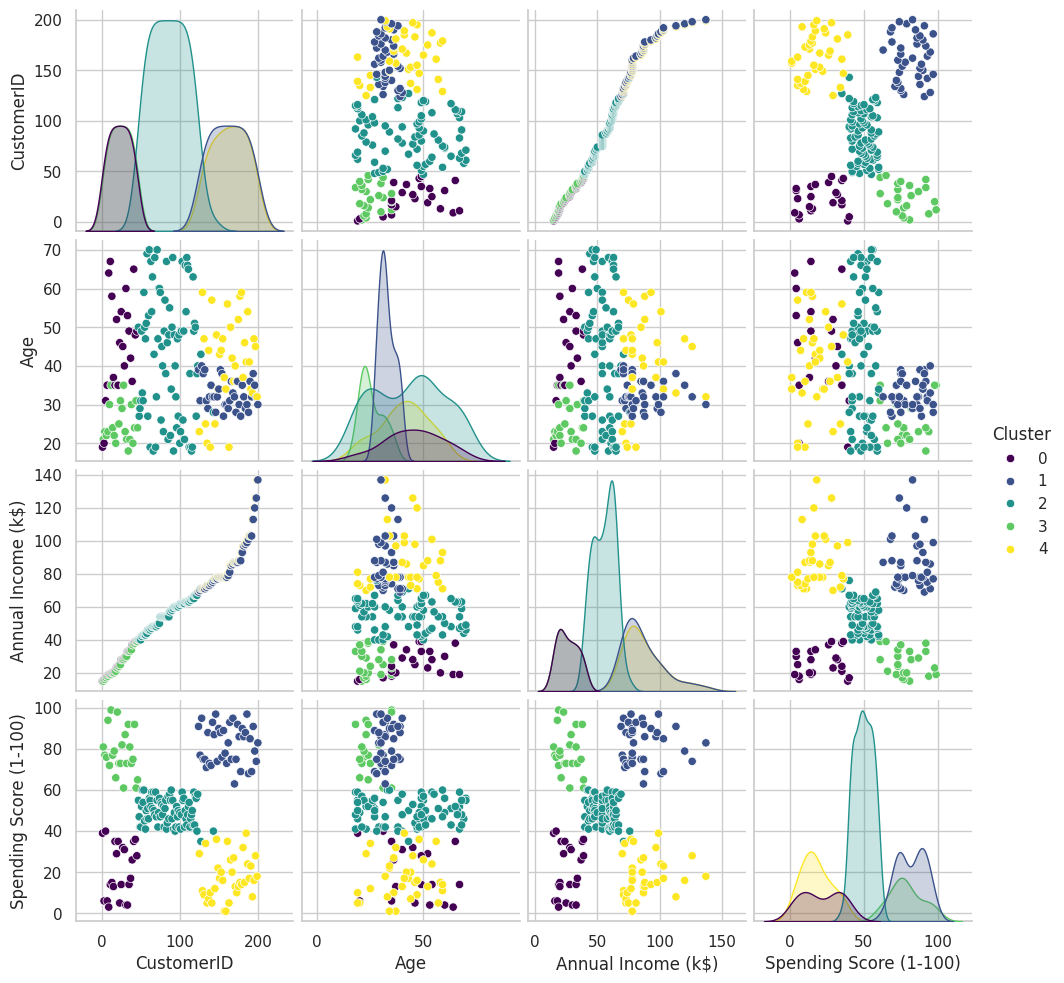

In [9]:
# Create a pairplot for relationships between the different features
sns.pairplot(df, hue='Cluster', palette='viridis')

# Display the plot
plt.show()

**Boxplot Analysis:**

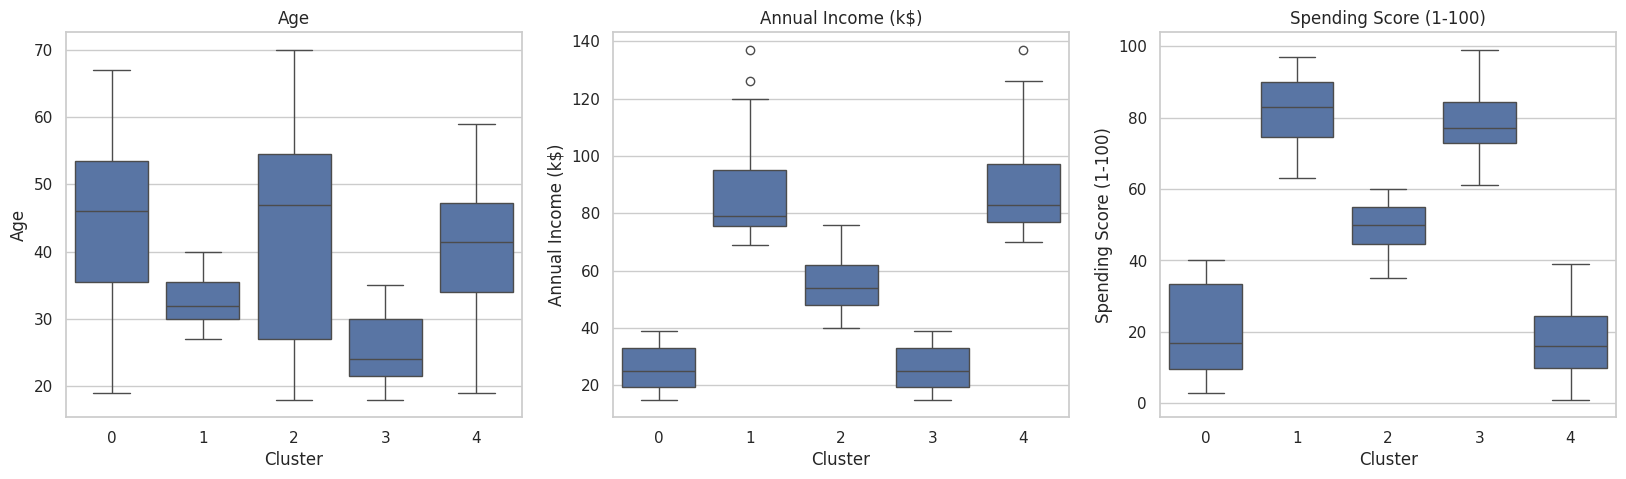

In [10]:
# Create a boxplot for each feature split by 'Cluster'
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Boxplot for 'Age'
sns.boxplot(data=df, x='Cluster', y='Age', ax=axs[0])
axs[0].set_title('Age')

# Boxplot for 'Annual Income (k$)'
sns.boxplot(data=df, x='Cluster', y='Annual Income (k$)', ax=axs[1])
axs[1].set_title('Annual Income (k$)')

# Boxplot for 'Spending Score (1-100)'
sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)', ax=axs[2])
axs[2].set_title('Spending Score (1-100)')

# Display the plots
plt.show()

**Silhouette Score** : A silhouette score near 1 indicates high-quality clustering, with datapoints in the same cluster close to each other and far from other clusters.
A score near 0 suggests overlapping clusters, indicating low-quality clustering and a score near -1 suggests datapoints are incorrectly clustered and would fit better in another cluster.

In [11]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score for the clustering
silhouette_score = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']], df['Cluster'])

# Print the silhouette score
print('Silhouette Score: ', silhouette_score)


Silhouette Score:  0.44428597560893024


**Principal Component Analysis** :

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features and transform them
scaled_features = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])

# Creating a PCA object with two components
pca = PCA(n_components=2)

# Fitting the PCA to the scaled features and transforming them
pca_features = pca.fit_transform(scaled_features)

# Creating a new KMeans object
kmeans = KMeans(n_clusters=5, random_state=42)

# Fitting the KMeans to the PCA features
kmeans.fit(pca_features)

# Assigning the cluster labels to a new column in the dataframe
df['PCA_Cluster'] = kmeans.labels_

# Calculating the silhouette score for the new clustering
pca_silhouette_score = silhouette_score(pca_features, df['PCA_Cluster'])

# Printing the silhouette score
print('PCA Silhouette Score: ', pca_silhouette_score)

PCA Silhouette Score:  0.39308250061186906


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Sillhouette Score decreased from 0.44 to 0.39

**Interpretetions from Clusters:**
1. Cluster 0: “Conservative Middle-Aged” — This cluster tends to include middle-aged individuals (average age 45) with relatively low annual income (average 26k). Their spending score is also low (average 20), which suggests they might be more conservative with their spending, possibly due to their lower income. This group might be less responsive to marketing efforts aimed at increasing spending.
2. Cluster 1: “Young High Earners” — This cluster includes younger individuals (average age 32) with high annual income (average 86k). They also have a high spending score (average 82), indicating they spend a significant portion of their income. This group could be a key target for marketing campaigns, as they have both the means and the willingness to spend.
3. Cluster 2: “Balanced Middle-Aged” — This cluster is made up of middle-aged individuals (average age 43) with moderate annual income (average 55k). Their spending score is around the middle of the range (average 49), suggesting a balanced approach to spending. Marketing strategies for this group might need to focus on value and quality, as they might be more discerning with their spending.
4. Cluster 3: “Wealthy Savers” — This cluster includes individuals around middle age (average age 40) with high annual income (average 87k), but their spending score is low (average 17). This suggests that despite their high income, they are conservative with their spending. Understanding why this group is not spending commensurate with their income could be a key insight. They might value saving, or they might not see value in the current offerings.
5. Cluster 4: “Young Spenders” — This cluster includes young individuals (average age 25) with low annual income (average 26k), but their spending score is high (average 78). This suggests that these individuals, despite having lower income, are willing to spend a significant portion of it. They might be impulse buyers, or they might value experiences or products over saving money.